Q. 3. (c)


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Import and preprocess the dataset
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

def build_Train_model(neurons, dropout_rate=None):
    #Building the model
    model = tf.keras.Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neurons, activation='relu')
    ])

    if dropout_rate is not None:
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))

    #Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    #Training the model
    model.fit(train_imgs, train_labels, epochs=10, verbose=0)

    #Evaluation of the model
    test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)
    return test_acc

#Configurations for experiments
configs = [
    {"neurons": 128, "dropout": None},
    {"neurons": 64, "dropout": None},    # Fewer neurons, using half of the neurons
    {"neurons": 256, "dropout": None},   # More neurons, twice the original neurons
    {"neurons": 128, "dropout": 0.1},    # Original neurons with dropout
    {"neurons": 128, "dropout": 0.4},    # Original neurons with 0.4 dropout
    {"neurons": 64, "dropout": 0.5}      # Fewer neurons with more dropout
]

#Run all the experiments
results_ann = {}
for config in configs:
    key = f"Neurons: {config['neurons']}, Dropout: {config['dropout']}"
    accuracy = build_Train_model(config['neurons'], config['dropout'])
    results_ann[key] = accuracy

results_ann


313/313 - 1s - loss: 0.3258 - accuracy: 0.8838 - 1s/epoch - 3ms/step
313/313 - 1s - loss: 0.3449 - accuracy: 0.8743 - 606ms/epoch - 2ms/step
313/313 - 4s - loss: 0.3278 - accuracy: 0.8870 - 4s/epoch - 12ms/step
313/313 - 1s - loss: 0.3291 - accuracy: 0.8849 - 1s/epoch - 3ms/step
313/313 - 1s - loss: 0.3503 - accuracy: 0.8726 - 643ms/epoch - 2ms/step
313/313 - 1s - loss: 0.3816 - accuracy: 0.8633 - 611ms/epoch - 2ms/step


{'Neurons: 128, Dropout: None': 0.8838000297546387,
 'Neurons: 64, Dropout: None': 0.8743000030517578,
 'Neurons: 256, Dropout: None': 0.8870000243186951,
 'Neurons: 128, Dropout: 0.1': 0.8848999738693237,
 'Neurons: 128, Dropout: 0.4': 0.8726000189781189,
 'Neurons: 64, Dropout: 0.5': 0.8633000254631042}

Q. 3. (d)

In [9]:
# Load and preprocess the dataset
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()
train_imgs = train_imgs.reshape((-1, 28, 28, 1)) / 255.0
test_imgs = test_imgs.reshape((-1, 28, 28, 1)) / 255.0

def build_and_train_cnn_model(filters, kernel_size, dropout_rate=None):
    # Build the CNN model
    model = tf.keras.Sequential()
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    if dropout_rate is not None:
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    #Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    #Training the model
    model.fit(train_imgs, train_labels, epochs=10, verbose=0)

    #Evaluation of the model
    test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)
    return test_acc

#Experiment configurations
configs = [
    {"filters": 32, "kernel_size": 3, "dropout": None},
    {"filters": 64, "kernel_size": 3, "dropout": None},
    {"filters": 32, "kernel_size": 5, "dropout": None},
    {"filters": 64, "kernel_size": 5, "dropout": 0.2}, #with dropout
    {"filters": 64, "kernel_size": 5, "dropout": 0.5}, #with 0.5 dropout
    {"filters": 32, "kernel_size": 3, "dropout": 0.5}  #with dropout
]

#Run all the experiments
cnn_results = {}
for config in configs:
    key = f"Filters: {config['filters']}, Kernel Size: {config['kernel_size']}, Dropout: {config['dropout']}"
    accuracy = build_and_train_cnn_model(config['filters'], config['kernel_size'], config['dropout'])
    cnn_results[key] = accuracy

cnn_results

313/313 - 2s - loss: 0.2761 - accuracy: 0.9104 - 2s/epoch - 7ms/step
313/313 - 5s - loss: 0.2944 - accuracy: 0.9130 - 5s/epoch - 18ms/step
313/313 - 2s - loss: 0.2786 - accuracy: 0.9102 - 2s/epoch - 7ms/step
313/313 - 5s - loss: 0.2903 - accuracy: 0.9151 - 5s/epoch - 15ms/step
313/313 - 6s - loss: 0.2637 - accuracy: 0.9107 - 6s/epoch - 19ms/step
313/313 - 2s - loss: 0.2580 - accuracy: 0.9087 - 2s/epoch - 7ms/step


{'Filters: 32, Kernel Size: 3, Dropout: None': 0.9103999733924866,
 'Filters: 64, Kernel Size: 3, Dropout: None': 0.9129999876022339,
 'Filters: 32, Kernel Size: 5, Dropout: None': 0.9101999998092651,
 'Filters: 64, Kernel Size: 5, Dropout: 0.2': 0.9150999784469604,
 'Filters: 64, Kernel Size: 5, Dropout: 0.5': 0.9107000231742859,
 'Filters: 32, Kernel Size: 3, Dropout: 0.5': 0.9086999893188477}

4422102/4422102 [==============================] - 0s 0us/step
Training model with Neurons: 128, Dropout: None


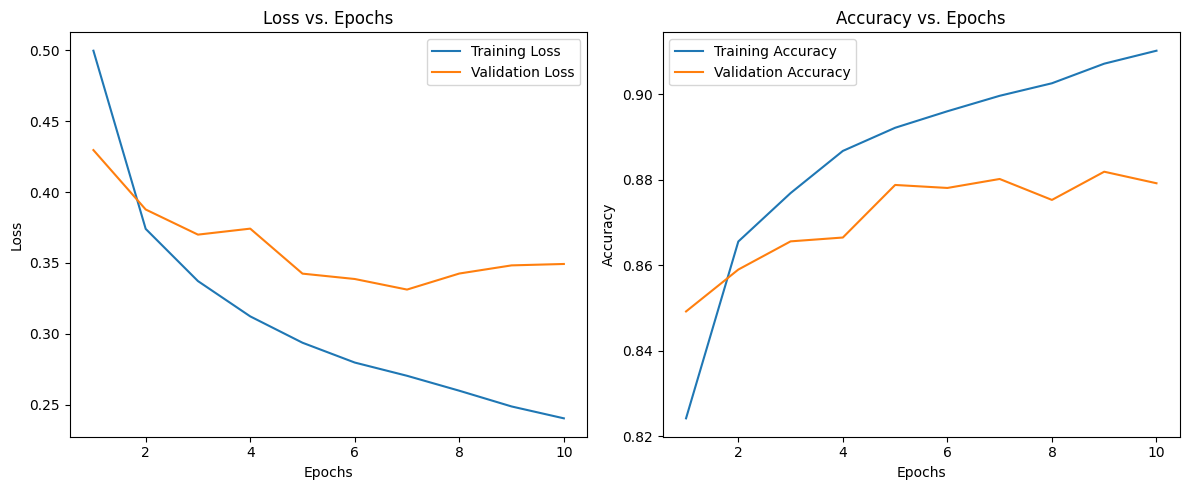

Training model with Neurons: 64, Dropout: None


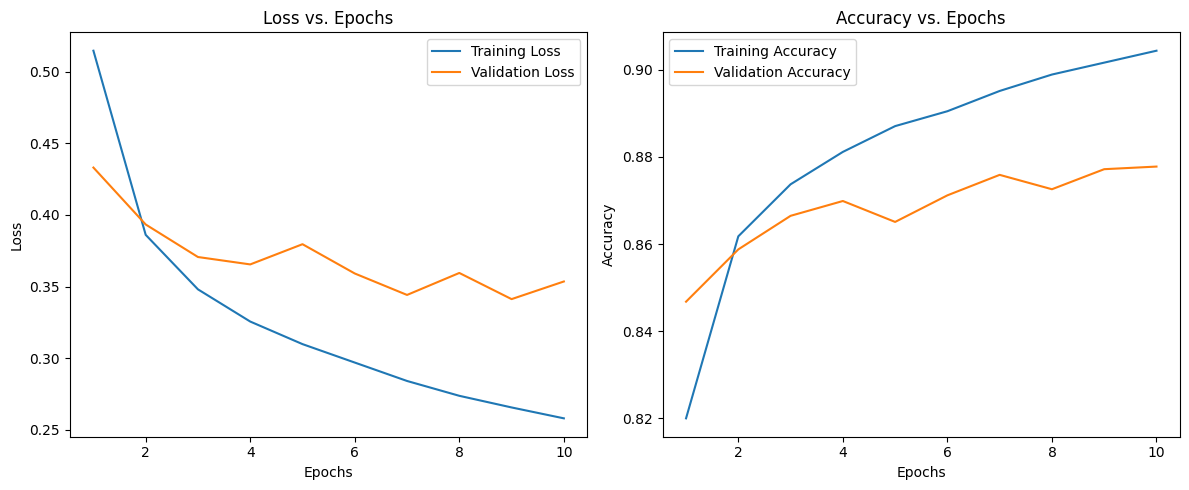

Training model with Neurons: 256, Dropout: None


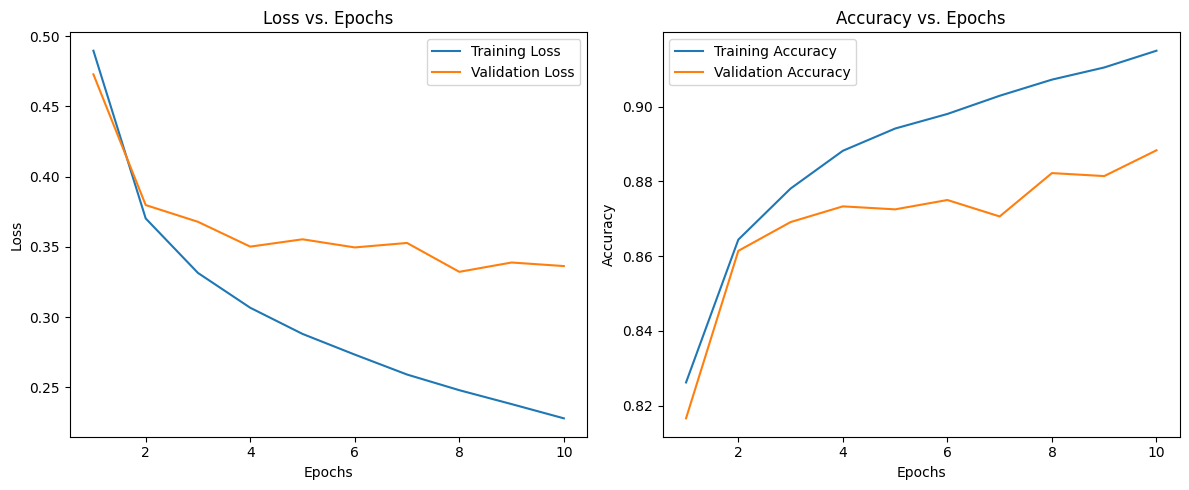

Training model with Neurons: 128, Dropout: 0.1


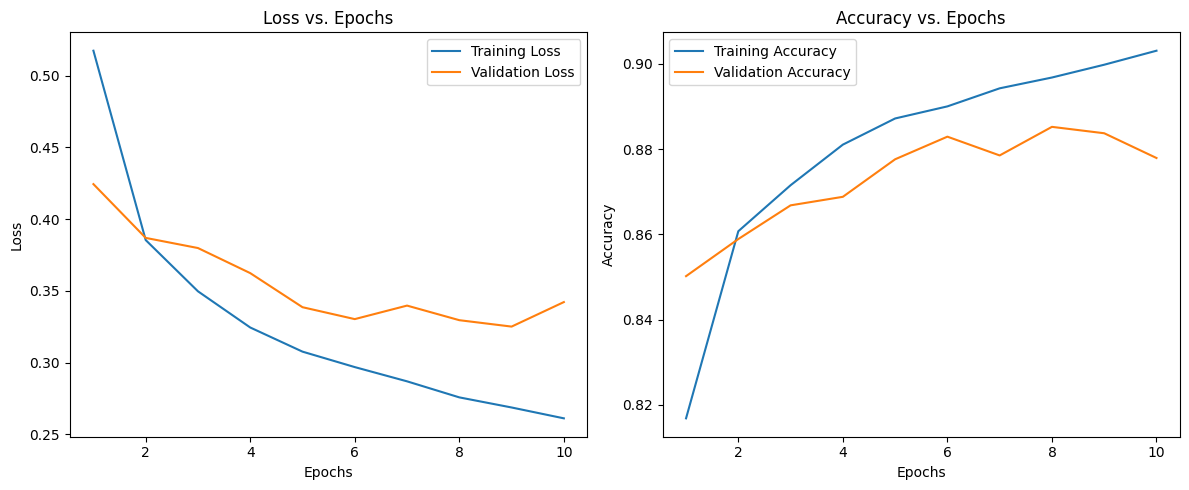

Training model with Neurons: 128, Dropout: 0.4


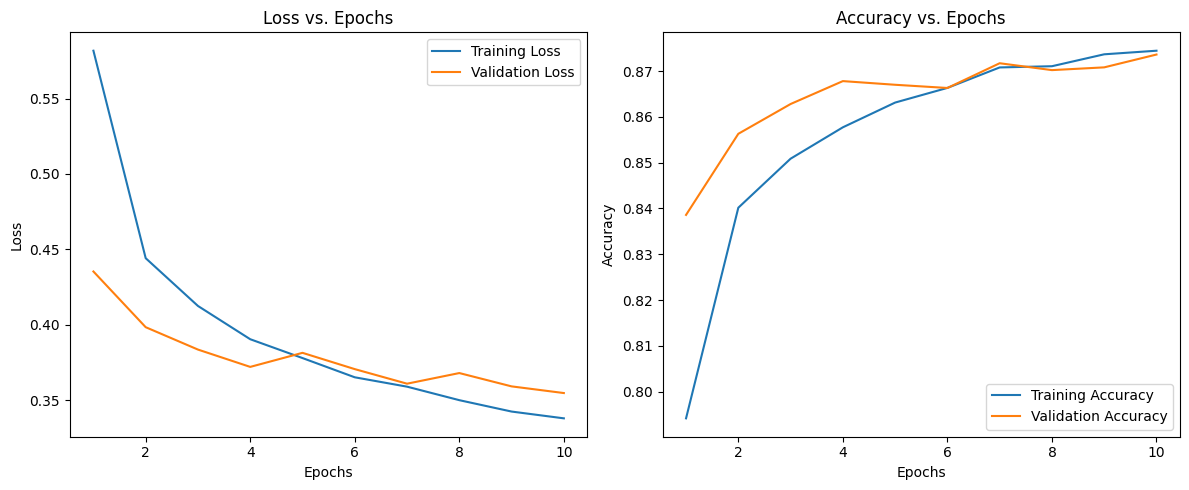

Training model with Neurons: 64, Dropout: 0.5


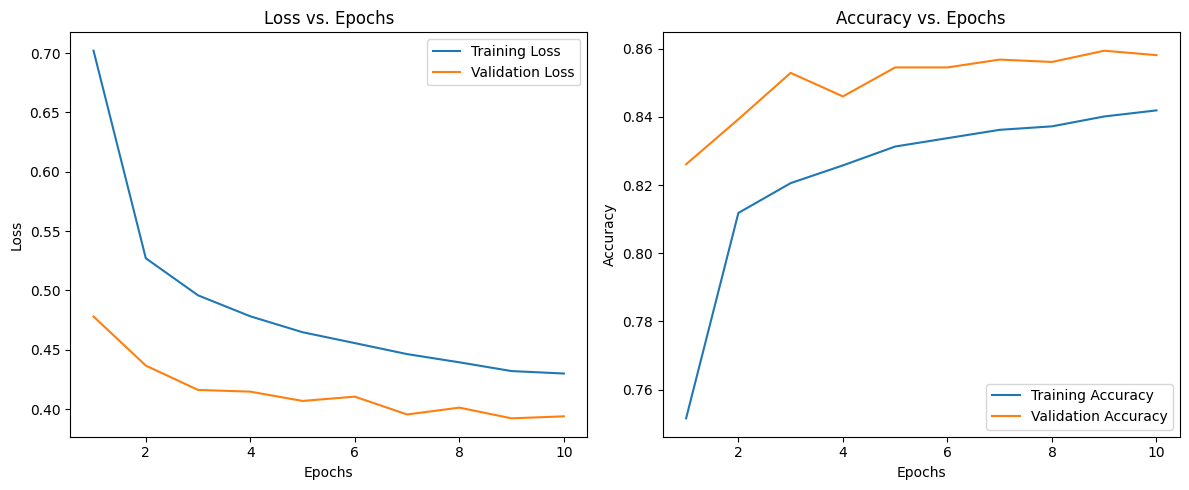

In [5]:
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

def build_and_train_model(neurons, dropout_rate=None):
    #Build the model
    model = tf.keras.Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neurons, activation='relu')
    ])

    if dropout_rate is not None:
        model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))

    #Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    #Train the model while saving the history
    history = model.fit(train_imgs, train_labels, epochs=10,
                        validation_data=(test_imgs, test_labels),
                        verbose=0)
    return history

def plot_learning_curves(history):
    epochs_range = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Experiment configurations
configs = [
    {"neurons": 128, "dropout": None},
    {"neurons": 64, "dropout": None},    # Fewer neurons, using half of the neurons
    {"neurons": 256, "dropout": None},   # More neurons, twice the original neurons
    {"neurons": 128, "dropout": 0.1},    # Original neurons with dropout
    {"neurons": 128, "dropout": 0.4},    # Original neurons with 0.4 dropout
    {"neurons": 64, "dropout": 0.5}      # Fewer neurons with more dropout
]

#Run experiments and plot learning curves using ANN
for config in configs:
    key = f"Neurons: {config['neurons']}, Dropout: {config['dropout']}"
    print(f"Training model with {key}")
    history = build_and_train_model(config['neurons'], config['dropout'])
    plot_learning_curves(history)


Training CNN model with Filters: 32, Kernel Size: 3, Dropout: None


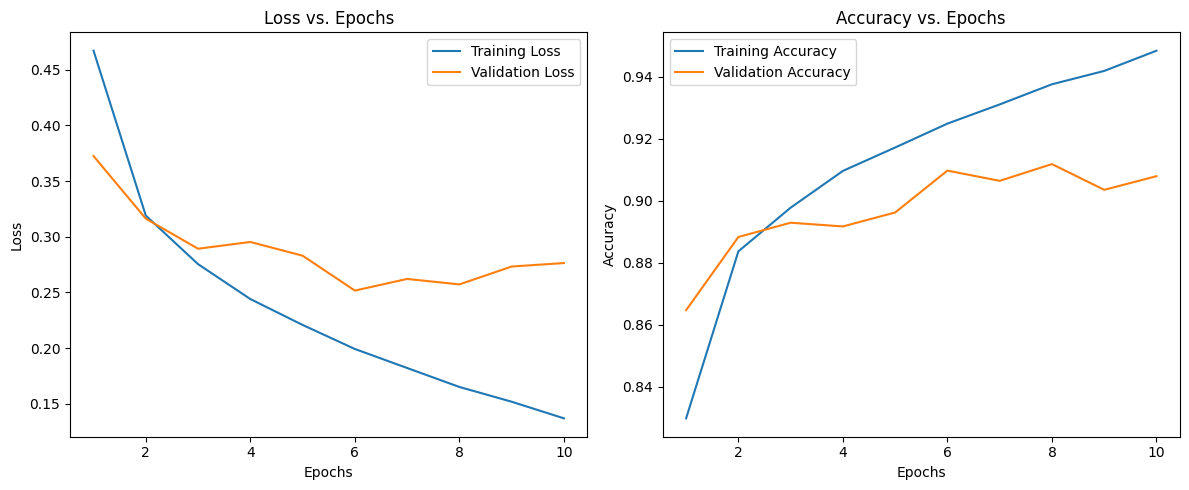

Training CNN model with Filters: 64, Kernel Size: 3, Dropout: None


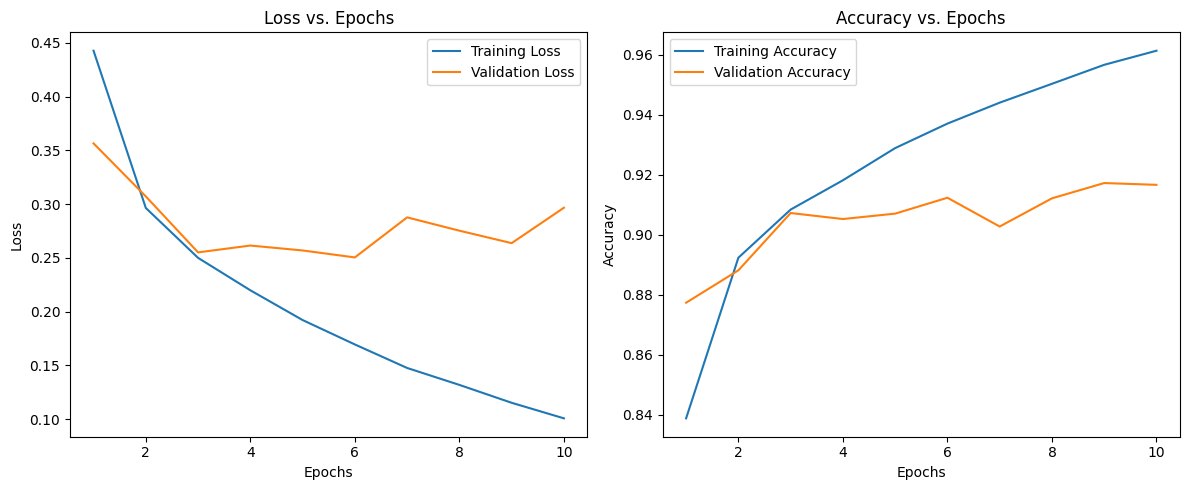

Training CNN model with Filters: 32, Kernel Size: 5, Dropout: None


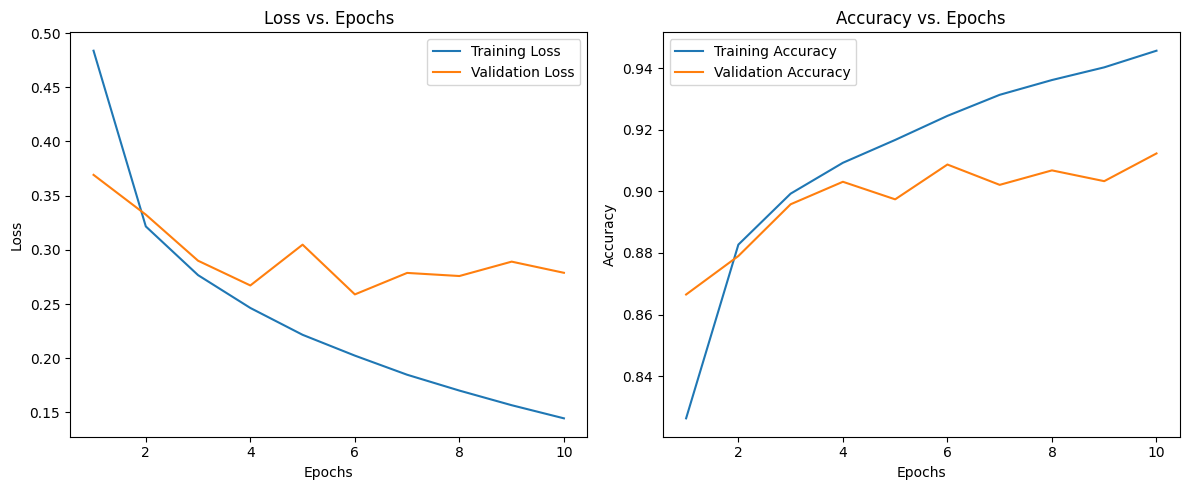

Training CNN model with Filters: 64, Kernel Size: 5, Dropout: 0.2


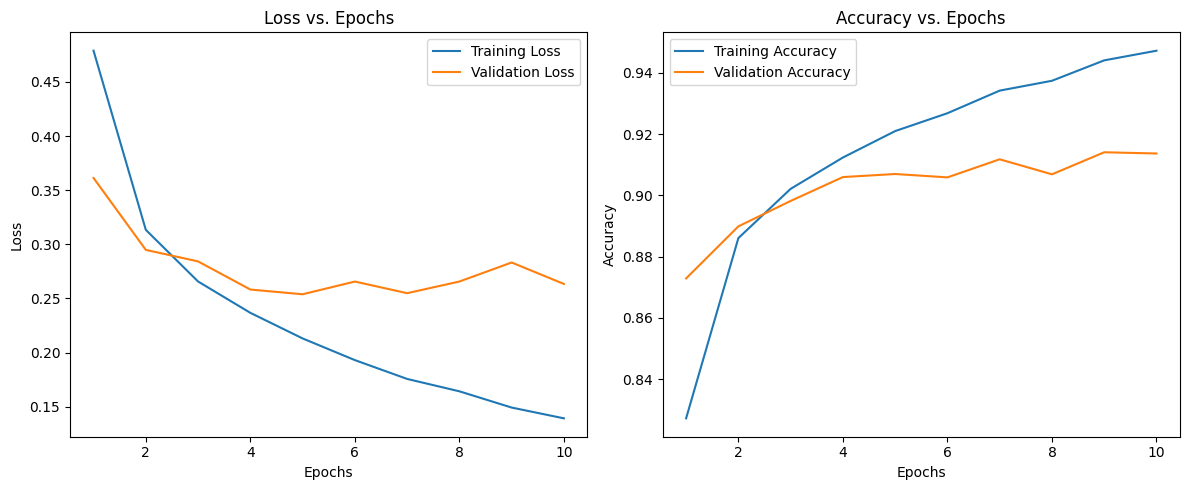

Training CNN model with Filters: 64, Kernel Size: 5, Dropout: 0.5


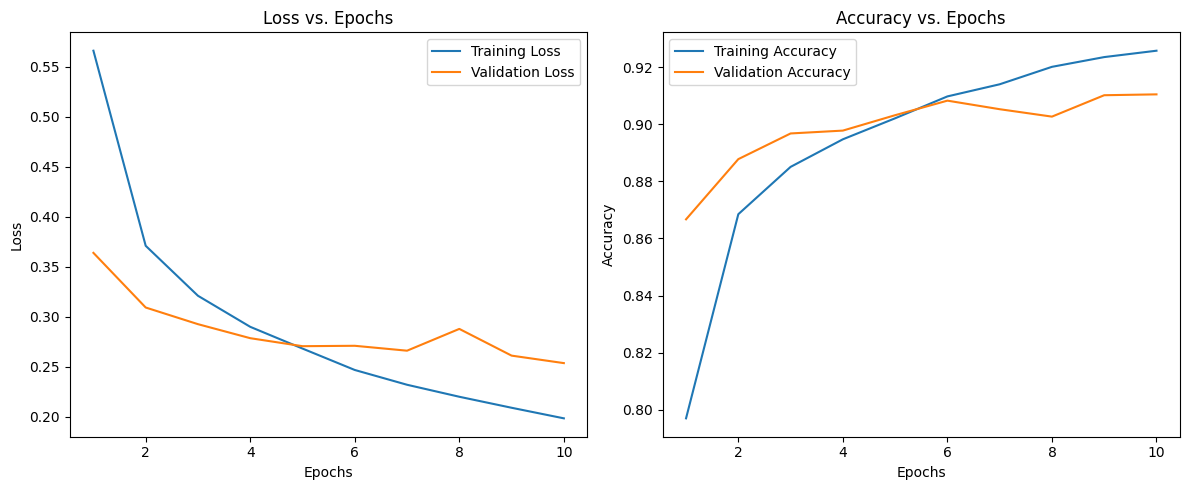

Training CNN model with Filters: 32, Kernel Size: 3, Dropout: 0.5


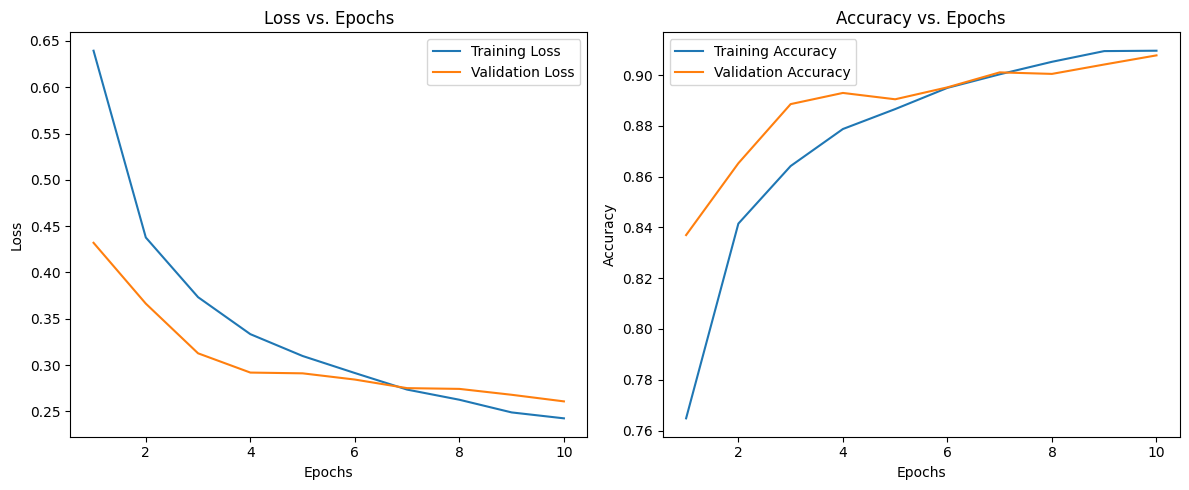

In [6]:

# Load and preprocess the dataset
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()
train_imgs = train_imgs.reshape((-1, 28, 28, 1)) / 255.0
test_imgs = test_imgs.reshape((-1, 28, 28, 1)) / 255.0

def build_and_train_cnn_model(filters, kernel_size, dropout_rate=None):
    # Build the CNN model
    model = tf.keras.Sequential()
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    if dropout_rate is not None:
        model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    #Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    #Train the model while saving the history
    history = model.fit(train_imgs, train_labels, epochs=10,
                        validation_data=(test_imgs, test_labels),
                        verbose=0)
    return history

def plot_learning_curves(history):
    epochs_range = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history.history['loss'], label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

#Experiment configurations
configs = [
    {"filters": 32, "kernel_size": 3, "dropout": None},
    {"filters": 64, "kernel_size": 3, "dropout": None},
    {"filters": 32, "kernel_size": 5, "dropout": None},
    {"filters": 64, "kernel_size": 5, "dropout": 0.2}, #with dropout
    {"filters": 64, "kernel_size": 5, "dropout": 0.5}, #with 0.5 dropout
    {"filters": 32, "kernel_size": 3, "dropout": 0.5}  #with dropout
]

#Run experiments and plot learning curves for CNNs
for config in configs:
    key = f"Filters: {config['filters']}, Kernel Size: {config['kernel_size']}, Dropout: {config['dropout']}"
    print(f"Training CNN model with {key}")
    history = build_and_train_cnn_model(config['filters'], config['kernel_size'], config['dropout'])
    plot_learning_curves(history)
